# 1. Install Dependencies

In [ ]:
!pip install labelme albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.6.1-py3-none-any.whl size=1439272 sha256=f4df6f0b2

# 1.2 Importing Data

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
IMAGES_PATH = os.path.join('data','images')
num_images = 30
os.makedirs(IMAGES_PATH, exist_ok=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/data'


In [ ]:
import zipfile
import os

# Define the path to your zip file
zip_path =  '/content/drive/MyDrive/data' # Update with your actual path in Drive
extract_path = "/content/"

# Extract the contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the folder
print(os.listdir(extract_path))


['.config', 'data', 'drive', 'sample_data']


In [ ]:
import os

# Define the base directory
BASE_DIR = 'aug_data'

# Define subfolders
folders = ['train', 'val', 'test']
subfolders = ['images', 'labels']

# Create the base directory and subfolders
for folder in folders:
  for subfolder in subfolders:
   path = os.path.join(BASE_DIR, folder)
   final_path = os.path.join(path,subfolder)
   os.makedirs(final_path, exist_ok=True)  # Create directories, ignoring if they already exist


# 3. Annotating Images using LabelMe

In [ ]:
!labelme

2025-02-06 15:22:27.685 | INFO     | labelme.config:get_config:66 - Loading config file from: /root/.labelmerc
QObject::moveToThread: Current thread (0x1879fa0) is not the object's thread (0x3257e40).
Cannot move to target thread (0x1879fa0)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.11/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, linuxfb, minimal, offscreen, vnc, webgl.



# 4. Building Pipeline And Load Image

### 2.1 Importing Dependencies

In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.3 Load Image into TF Data Pipeline

In [ ]:
import tensorflow as tf
import os

# Define file path
file_path = 'data/images/*.jpg'

# Check if the path exists and contains files
if not os.path.exists('data/images'):
    raise FileNotFoundError(f"Directory 'data/images' does not exist.")
if len(os.listdir('data/images')) == 0:
    raise FileNotFoundError(f"No files found in 'data/images'.")

# Load files into TensorFlow Dataset
try:
    images = tf.data.Dataset.list_files(file_path)
    for img in images.as_numpy_iterator():
        print(img)
except tf.errors.InvalidArgumentError as e:
    print("No matching files found:", e)


No matching files found: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data/images/*.jpg'


NameError: name 'images' is not defined

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
90*.7 # 63 to train

In [ ]:
90*.15 # 14 and 13 to test and val

### 3.2 Move the Matching Labels

In [ ]:
import os
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [ ]:
file = "image1.jpg"
file.split('.')
file.split('.')[0]

'image1'

# 4. Image Augmentation on Images and Label it using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [ ]:
import albumentations as alb

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [ ]:
img = cv2.imread(os.path.join('data','train', 'images','10e686d8-a40e-11ef-a0ed-18473da52c96.jpg'))

In [ ]:
with open(os.path.join('data', 'train', 'labels', '10e686d8-a40e-11ef-a0ed-18473da52c96.json'), 'r') as f:
    label = json.load(f)

In [ ]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'Face',
   'points': [[78.5164835164835, 6.483516483516489],
    [504.8901098901099, 387.2527472527472]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\.ipynb_checkpoints\\10e686d8-a40e-11ef-a0ed-18473da52c96.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEI

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[78.5164835164835, 6.483516483516489, 504.8901098901099, 387.2527472527472]

In [ ]:
coords = np.divide(coords, [640,480,640,480])

In [ ]:
coords

array([0.12268201, 0.01350733, 0.7888908 , 0.80677656])

### 4.4 Apply Augmentations and View Results

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [ ]:
augmented['bboxes'][0][2:]

[1.0, 0.7134798304239909]

In [ ]:
augmented['bboxes']
tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int))

(155, 45)

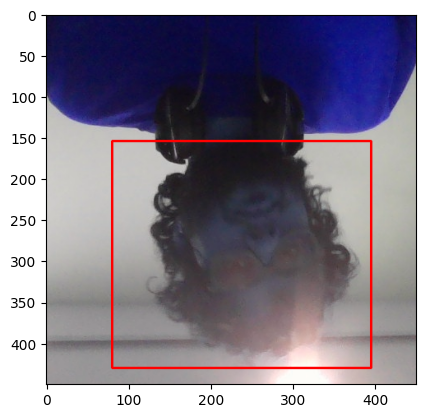

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [ ]:
import os
import cv2
import json
import numpy as np
import albumentations as alb
from matplotlib import pyplot as plt
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0,0]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.76742786 0.76671243 0.13126718 0.01236264 0.        ].
image must be numpy array type
image must be numpy array type


In [ ]:
annotation

### 5.2 Load Augmented Images to Tensorflow Dataset

In [ ]:
import tensorflow as tf
file_path = 'aug_data/train/images/*.jpg'
train_images = tf.data.Dataset.list_files(file_path, shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
file_path = 'aug_data/test/images/*.jpg'
test_images = tf.data.Dataset.list_files(file_path, shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
file_path = 'aug_data/val/images/*.jpg'
val_images = tf.data.Dataset.list_files(file_path, shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [ ]:
import tensorflow as tf

In [ ]:
file_path = 'aug_data/train/labels/*.json'
train_labels = tf.data.Dataset.list_files(file_path  , shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json'  , shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.1594, 0.7085, 1.    ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3720, 3720, 840, 840, 780, 840)

### 7.2 Create Final Datasets (Images/Labels)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()

(array([[[[0.4935049 , 0.08235294, 0.04963235],
          [0.48235294, 0.07843138, 0.05453431],
          [0.48578432, 0.08970588, 0.05147059],
          ...,
          [0.40625   , 0.38125   , 0.29938725],
          [0.40373775, 0.3803309 , 0.31629902],
          [0.41881126, 0.39283088, 0.35251224]],
 
         [[0.51029414, 0.08137255, 0.06262255],
          [0.5054534 , 0.08192402, 0.07107843],
          [0.48688725, 0.08094363, 0.06237745],
          ...,
          [0.44957107, 0.41433823, 0.34963235],
          [0.4569853 , 0.42297795, 0.3872549 ],
          [0.47175246, 0.46194854, 0.44123775]],
 
         [[0.5246936 , 0.08302696, 0.07028186],
          [0.5193015 , 0.08192402, 0.07898284],
          [0.513174  , 0.08964461, 0.08137255],
          ...,
          [0.46133578, 0.4456495 , 0.40165442],
          [0.47977942, 0.46709558, 0.44595587],
          [0.58933824, 0.59405637, 0.57150733]],
 
         ...,
 
         [[0.75177693, 0.7596201 , 0.85765934],
          [0.77003

### 7.3 View Images and Annotations

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

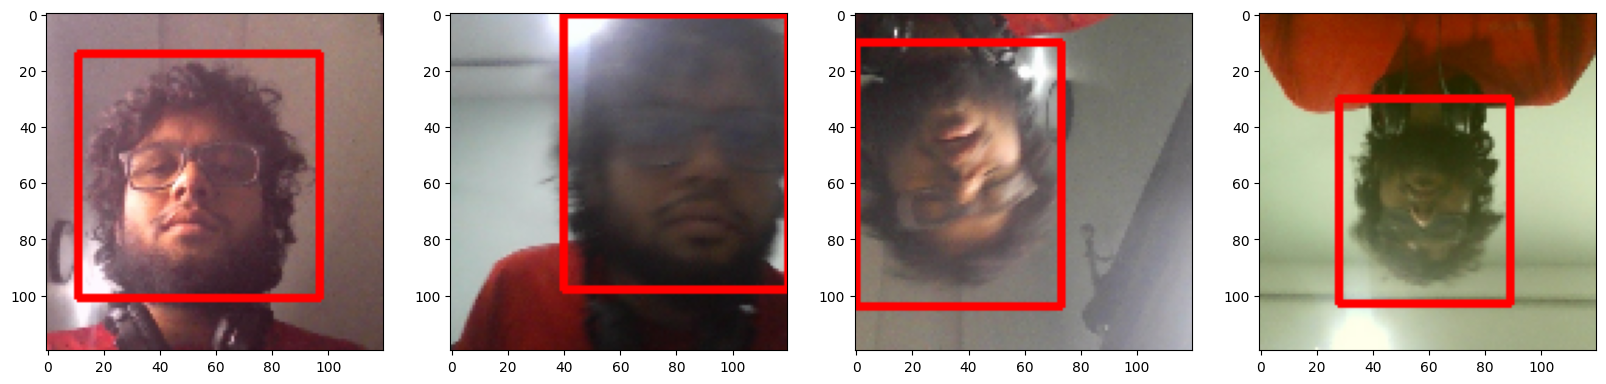

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    # Extract image and coordinates
    sample_image = res[0][idx].copy()  # Create a writable copy of the image
    sample_coords = res[1][1][idx]

    # Draw rectangle on the image
    cv2.rectangle(
        sample_image,
        tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),  # Top-left corner
        tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),  # Bottom-right corner
        (255, 0, 0),  # Color (Blue in BGR)
        2  # Thickness
    )

    # Display the image
    ax[idx].imshow(sample_image)

plt.show()


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [ ]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 120, 120, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 3, 3, 512)      │     14,714,688 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d      │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_1    │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2048)           │      1,050,624 │ global_max_pooling2d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 2048)           │      1,050,624 │ global_max_pooling2d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          2,049 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │          8,196 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
y

In [ ]:
X.shape

In [ ]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
classes, coords

In [ ]:
y[1]



# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [ ]:
len(train)

465

In [ ]:
batches_per_epoch = len(train)


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

### 9.2 Create Localization Loss and Classification Loss

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.48196792602539>

In [ ]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5994316935539246>

In [ ]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.48196792602539>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [ ]:
from tensorflow.keras import saving
from tensorflow.keras.models import Model

@saving.register_keras_serializable()
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        X, y = batch
        y[0].set_shape([None, 1])

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            y0 = tf.cast(y[0], tf.float32)
            batch_classloss = self.closs(y0, classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5 * batch_classloss
            grad = tape.gradient(total_loss, self.model.trainable_variables)

        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch
        y[0].set_shape([None, 1])

        classes, coords = self.model(X, training=False)
        y0 = tf.cast(y[0], tf.float32)
        batch_classloss = self.closs(y0, classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

    def get_config(self):
        # Ensure facetracker is serialized properly
        config = super().get_config()
        config.update({"facetracker": saving.serialize_keras_object(self.model)})
        return config

    @classmethod
    def from_config(cls, config):
        facetracker = saving.deserialize_keras_object(config.pop("facetracker"))
        return cls(facetracker=facetracker, **config)


In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
465/465 ━━━━━━━━━━━━━━━━━━━━ 76s 99ms/step - class_loss: 0.0068 - regress_loss: 0.1783 - total_loss: 0.1817 - val_class_loss: 5.8493e-06 - val_regress_loss: 0.3157 - val_total_loss: 0.3157
Epoch 2/40
465/465 ━━━━━━━━━━━━━━━━━━━━ 46s 86ms/step - class_loss: 3.6329e-06 - regress_loss: 0.0373 - total_loss: 0.0373 - val_class_loss: 1.9907e-07 - val_regress_loss: 0.4050 - val_total_loss: 0.4050
Epoch 3/40
465/465 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - class_loss: 8.1779e-07 - regress_loss: 0.0204 - total_loss: 0.0204 - val_class_loss: 9.0284e-08 - val_regress_loss: 0.4883 - val_total_loss: 0.4883
Epoch 4/40
465/465 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - class_loss: 5.1145e-07 - regress_loss: 0.0166 - total_loss: 0.0166 - val_class_loss: 8.0626e-08 - val_regress_loss: 0.3604 - val_total_loss: 0.3604
Epoch 5/40
465/465 ━━━━━━━━━━━━━━━━━━━━ 86s 89ms/step - class_loss: 2.4249e-07 - regress_loss: 0.0119 - total_loss: 0.0119 - val_class_loss: 9.4767e-08 - val_regress_loss: 0.2329 - val_tot

In [ ]:
print("y[0] shape:", y[0].shape)
print("classes shape:", classes.shape)


### 11.2 Save the Model

In [ ]:
model.save('drive/MyDrive/FaceDetection_model(1).h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load model without compiling
fashgan = load_model(
    '/content/drive/MyDrive/FaceDetection_model(1).h5',
    custom_objects={
        'FaceTracker': FaceTracker,
        'classloss': classloss,
        'regressloss': regressloss  # Ensure this function is defined
    },
    compile=False  # Disable automatic compilation
)


### 10.3 Plot Performance

In [ ]:
hist.history

{'class_loss': [7.266603461175691e-06,
  1.3977174830870354e-06,
  1.2930765933560906e-06,
  3.337306395678752e-07,
  3.4841065144064487e-07,
  1.0534077432566846e-07,
  2.9455669903200032e-08,
  1.2741821819872712e-07,
  2.2283464318206825e-07,
  5.3488665940903957e-08,
  6.355324444484722e-08,
  1.0141732786905777e-08,
  2.057685719591973e-07,
  1.2211044619903078e-08,
  2.942608468003982e-08,
  1.0095719815694792e-08,
  7.375006383369964e-09,
  1.5429555411117235e-09,
  2.3304446372662824e-08,
  7.58655449573098e-09,
  1.047564257561362e-09,
  2.2703034119331278e-08,
  1.247671477244694e-08,
  1.261837745403227e-08,
  7.231579779443109e-09,
  4.459249858257408e-09,
  1.1536000599221552e-08,
  1.565783769308382e-08,
  5.144659365186044e-09,
  1.0772454039909007e-09,
  1.9535122408598227e-09,
  2.3349794986415873e-08,
  4.900959194031884e-09,
  4.841252287945963e-09,
  4.566862443766695e-09,
  8.086527003570154e-09,
  3.638834789043699e-09,
  4.88636953122068e-09,
  6.985726996866504e

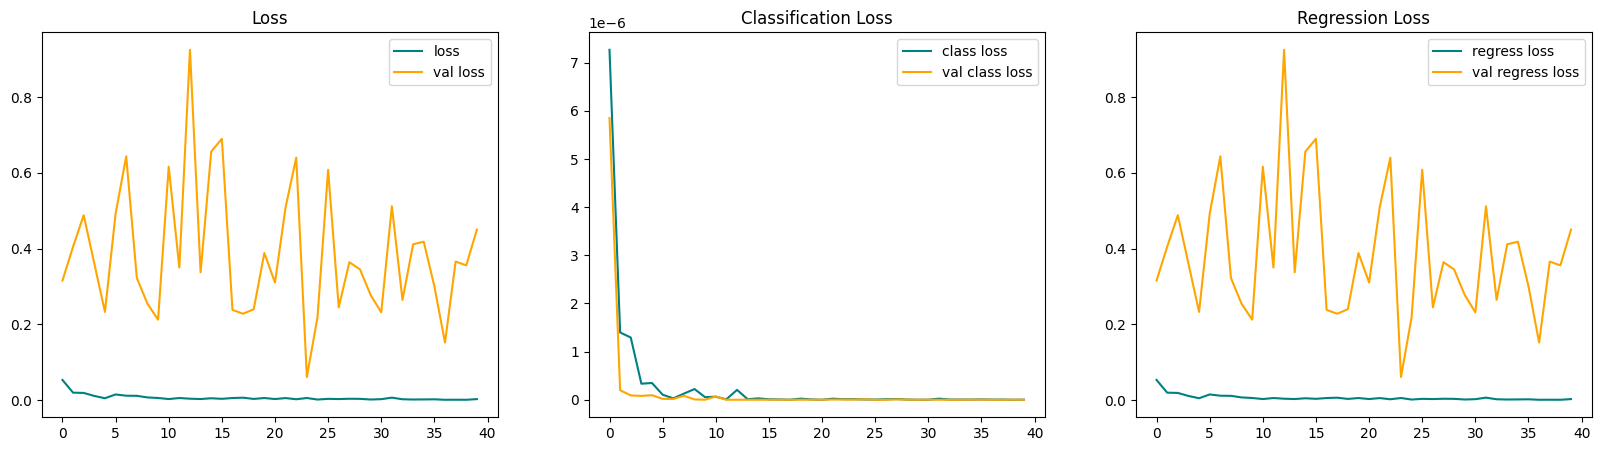

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


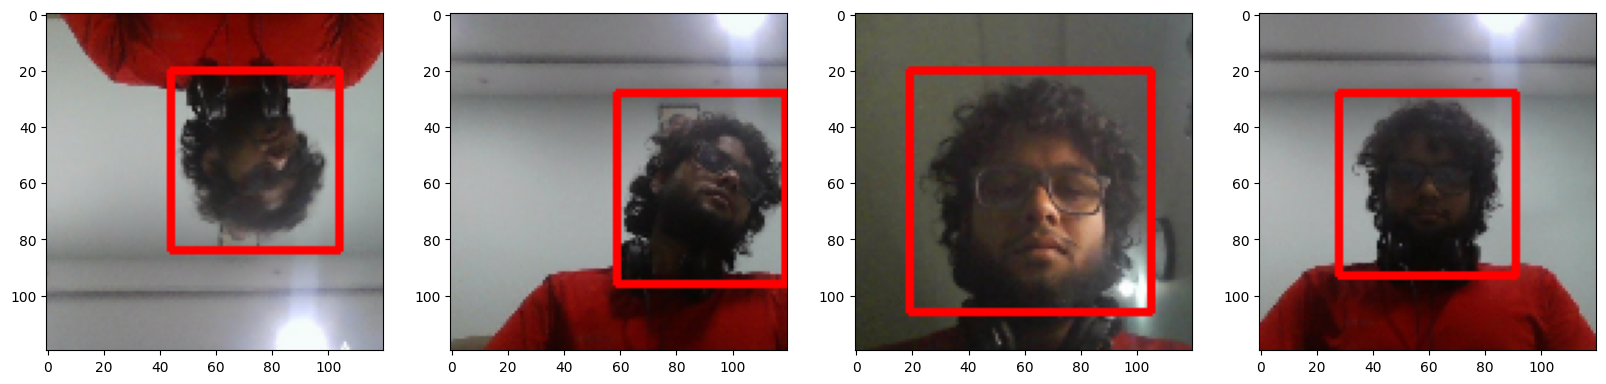

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)